In [1]:
import numpy as np 
import pickle
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data_commets = pd.read_csv('attack_annotated_comments.csv')

In [3]:
data_attack= pd.read_csv('attack_annotations.csv')

In [4]:
data_commets

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train
...,...,...,...,...,...,...,...
115859,699848324,`NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENThese ...,2016,True,article,blocked,train
115860,699851288,NEWLINE_TOKENNEWLINE_TOKENThe Institute for Hi...,2016,True,article,blocked,test
115861,699857133,NEWLINE_TOKEN:The way you're trying to describ...,2016,True,article,blocked,train
115862,699891012,NEWLINE_TOKENNEWLINE_TOKEN== Warning ==NEWLINE...,2016,True,user,blocked,dev


In [5]:
data_attack

,rev_id,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
0,37675,1362,0.0,0.0,0.0,0.0,0.0
1,37675,2408,0.0,0.0,0.0,0.0,0.0
2,37675,1493,0.0,0.0,0.0,0.0,0.0
3,37675,1439,0.0,0.0,0.0,0.0,0.0
4,37675,170,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1365212,699897151,628,0.0,0.0,0.0,0.0,0.0
1365213,699897151,15,0.0,0.0,0.0,0.0,0.0
1365214,699897151,57,0.0,0.0,0.0,0.0,0.0
1365215,699897151,1815,0.0,0.0,0.0,0.0,0.0


In [6]:
data_attack.drop(columns=data_attack.columns[1:-1], inplace=True)
summery = data_attack.groupby(['rev_id']).sum()
data = data_commets.set_index('rev_id').join(summery)

In [7]:
data

,comment,year,logged_in,ns,sample,split,attack
rev_id,,,,,,,
37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,0.0
44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train,0.0
49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train,0.0
89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,4.0
93890,This page will need disambiguation.,2002,True,article,random,train,0.0
...,...,...,...,...,...,...,...
699848324,`NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENThese ...,2016,True,article,blocked,train,1.0
699851288,NEWLINE_TOKENNEWLINE_TOKENThe Institute for Hi...,2016,True,article,blocked,test,1.0
699857133,NEWLINE_TOKEN:The way you're trying to describ...,2016,True,article,blocked,train,0.0


In [8]:
data['attack'].unique()

array([ 0.,  4.,  2.,  1.,  3.,  6.,  7.,  5.,  8.,  9., 14., 10., 11.,
       18., 12., 19., 26., 15., 28., 25., 17., 23., 21., 13., 30., 27.,
       16., 24., 20., 29., 22., 36., 31., 42.])

In [9]:
data.loc[data['attack']>=1, 'attack'] = 1

In [10]:
data['attack'].unique()

array([0., 1.])

In [11]:
ss = pd.DataFrame(data)
ss.to_csv (r'C:/Users/jpinf/Downloads/hate/Wikipedia Dataset/personals.csv', index = False, header=True)

In [12]:
data[data['attack']==1].shape

(58631, 7)

In [13]:
data[data['attack']==0].shape

(57233, 7)

In [14]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"

In [15]:
import re


In [16]:
def remove_URL(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',tweet)

remove_URL(example)

'New competition launched :'

In [17]:
import string

In [18]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [19]:
data

,comment,year,logged_in,ns,sample,split,attack
rev_id,,,,,,,
37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,0.0
44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train,0.0
49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train,0.0
89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,1.0
93890,This page will need disambiguation.,2002,True,article,random,train,0.0
...,...,...,...,...,...,...,...
699848324,`NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENThese ...,2016,True,article,blocked,train,1.0
699851288,NEWLINE_TOKENNEWLINE_TOKENThe Institute for Hi...,2016,True,article,blocked,test,1.0
699857133,NEWLINE_TOKEN:The way you're trying to describ...,2016,True,article,blocked,train,0.0


In [20]:
#train['comment']=train['comment'].apply(lambda x : remove_punct(x))

In [21]:
#data=data.dropna()

In [22]:
data

,comment,year,logged_in,ns,sample,split,attack
rev_id,,,,,,,
37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,0.0
44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,False,article,random,train,0.0
49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,False,article,random,train,0.0
89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev,1.0
93890,This page will need disambiguation.,2002,True,article,random,train,0.0
...,...,...,...,...,...,...,...
699848324,`NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENThese ...,2016,True,article,blocked,train,1.0
699851288,NEWLINE_TOKENNEWLINE_TOKENThe Institute for Hi...,2016,True,article,blocked,test,1.0
699857133,NEWLINE_TOKEN:The way you're trying to describ...,2016,True,article,blocked,train,0.0


In [23]:
df_x=data['comment']
df_y=data['attack']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.3, random_state=9)
print(x_train.shape)
print(x_test.shape)

(81104,)
(34760,)


In [25]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer= TfidfVectorizer(min_df=1,stop_words='english')

In [27]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
X_test_counts=tfidf_vectorizer.transform(x_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [39]:
rf = RandomForestClassifier(n_estimators=20,random_state=33)
rf = rf.fit(tfidf_train, y_train)

In [40]:
rf.score(tfidf_train,y_train)

0.9955119352929572

In [41]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test_counts )
accuracy_score(y_pred,y_test) 

0.7161967779056386

In [42]:
import sklearn.metrics

In [43]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.79      0.73     17120
         1.0       0.76      0.64      0.70     17640

    accuracy                           0.72     34760
   macro avg       0.72      0.72      0.72     34760
weighted avg       0.72      0.72      0.71     34760



In [44]:
y_pred = rf.predict(X_test_counts )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[13540,  3580],
       [ 6285, 11355]], dtype=int64)

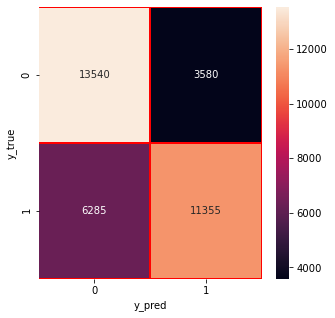

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [46]:
import pickle

pickle.dump(tfidf_vectorizer,open('tfid_wiki.pkl','wb'))
tfid_wikis = pickle.load(open('tfid_wiki.pkl','rb'))

In [47]:
import pickle

pickle.dump(rf,open('wiki.pkl','wb'))
wikis = pickle.load(open('wiki.pkl','rb'))